#                                                              MScFE Capstone Project



**Research Track**:    Chrispen Michael Mushore - (chrispenmushore@gmail.com)


**Practical (Code)**:     Moselane Peea – (peeamoselane@yahoo.com)



### Emerging Markets: Which financial ratios are best in identifying good buys?

Group: **34**
May 2020

### Problem statement
Investors are always looking for ways to determine the best stocks for a portfolio. There is always a question of whether the same methods of stocks selection applied in developed markets. Can the financial ratios utilised for developed markets hold the same significance in the emerging markets.
Considering the market imperfections, barriers to entry, government regulation, political risk and differences in financial reporting and other impediments in emerging markets, there is need to explore the necessity or lack of it to deviate from the normal methods that work in developed markets.
This can be addressed by investigating the financial ratios and techniques that actually work for identifying good buy in emerging markets.


***Ten Emerging companies we are going to use***

China Construction Bank Corporation (CICHY)
    
China Minsheng Banking Corp., Ltd. (1988.HK)

China Petroleum & Chemical Corporation (SNP)

China Life Insurance Company Limited (LFC)

CHINA MERCHANTS BANK CO LTD (CIHKY)

AGRICULTURAL BANK OF CHINA (ACGBY)

BANK OF CHINA LTD (BACHY)

INDUSTRIAL & COMMERCIAL BK OF CHINA (IDCBY)

PING AN INSURANCE(GROUP)CO.OF CHINA (PNGAY)

China Telecom Corp Ltd (CHA)

## Collecting stock prices

In [3]:
#import packages we need
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [70]:
#Loading all the company prices dowloaded
data = pd.read_csv("CICHY.csv")
data = pd.read_csv("1988.HK.csv")
data = pd.read_csv("SNP.csv")
data = pd.read_csv("LFC.csv")
data = pd.read_csv("CIHKY.csv")
data = pd.read_csv("ACGBY.csv")
data = pd.read_csv("BACHY.csv")
data = pd.read_csv("IDCBY.csv")
data = pd.read_csv("PNGAY.csv")
data = pd.read_csv("CHA.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-12,71.180000,71.540001,71.029999,71.519997,62.479401,77300
1,2015-05-13,73.150002,73.349998,72.589996,72.739998,63.545177,333000
2,2015-05-14,71.910004,71.910004,71.150002,71.190002,62.191116,113500
3,2015-05-15,73.849998,74.419998,73.650002,74.250000,64.864311,47800
4,2015-05-18,71.970001,71.980003,71.010002,71.220001,62.217327,113000


## Collecting Financial Statements

1. Income Statements

2. Cash Flow Statements

3. Balance Sheet

In [13]:
import requests
import json
import pandas as pd

In [14]:
from bs4 import BeautifulSoup
import urllib.request as ur

**Processing**

Here is a simple trick you can flexibly adjust the stock symbol and plug it into the URL link. 
It will come in handy later if you want to extract hundreds of company’s financial statements.

In [15]:
# Enter a stock symbol
index = "CICHY"

# URL link 
url_is = 'https://finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://finance.yahoo.com/quote/' + index + '/balance-sheet?p=' + index
url_cf = 'https://finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

open the link and read it into a proper format called lxml. Simple enough.

In [16]:
read_data = ur.urlopen(url_is).read() 
soup_is= BeautifulSoup(read_data,'lxml')

Read the link in **lxml**

In [17]:
soup_is

<!DOCTYPE html>
<html class="NoJs featurephone" id="atomic" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>CHINA CONSTRUCTION BANK (CICHY) Income Statement - Yahoo Finance</title><meta content="income statement,gross profit,revenue,operating expenses,operating income,net income,earning,earning per share" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="90376669494" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Get the detailed quarterly/annual income statement for CHINA CONSTRUCTION BANK (CICHY). Find out the revenue, expenses and profit or loss over the last fiscal year." lang="en-US" name="description"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"/><me

**Data Manipulation**

But how do know which classes the relevant data are stored in?
After a few searches, we know that they are stored in“div”, we can create an empty list 
and use a for loop to find all elements and append them to the list.

In [18]:
ls= [] # Create empty list
for l in soup_is.find_all('div'): 
  #Find all data structure that is ‘div’
  ls.append(l.string) # add each element one by one to the list
 
ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns

In [20]:
new_ls = list(filter(None,ls))
new_ls

[' react-empty: 6 ',
 "No matching results for ''",
 'Tip: Try a valid symbol or a specific company name for relevant results',
 'Cancel',
 ' react-empty: 2 ',
 ' react-empty: 2 ',
 'CICHY - China Construction Bank Corporation',
 'Other OTC - Other OTC Delayed Price. Currency in USD',
 'Income Statement',
 'Balance Sheet',
 'Cash Flow',
 'Annual',
 'Quarterly',
 'Expand All',
 'ttm',
 '12/31/2019',
 '12/31/2018',
 '12/31/2017',
 '12/31/2016',
 '727,693,000',
 '705,380,000',
 '658,751,000',
 '621,498,000',
 '605,021,000',
 'Income from Associates & Other Participating Interests',
 '265,000',
 '249,000',
 '140,000',
 '161,000',
 '69,000',
 '-169,093,000',
 '-163,521,000',
 '-150,988,000',
 '-127,362,000',
 '-93,204,000',
 'Other Non Operating Income Expenses',
 '-401,000',
 '-357,000',
 '-354,000',
 '1,601,000',
 '2,821,000',
 'Pretax Income',
 '329,126,000',
 '326,597,000',
 '308,160,000',
 '299,787,000',
 '295,210,000',
 'Tax Provision',
 '56,848,000',
 '57,375,000',
 '52,534,000',
 '5

In [21]:
new_ls = new_ls[12:]

Well, now we have a list. But how do we turn it into a data frame? First, we need to iterate 6 
items at a time and store them in tuples. However, 
we want a list so that the pandas library can read it into a data frame

In [22]:
is_data = list(zip(*[iter(new_ls)]*6))
is_data

[('Quarterly', 'Expand All', 'ttm', '12/31/2019', '12/31/2018', '12/31/2017'),
 ('12/31/2016',
  '727,693,000',
  '705,380,000',
  '658,751,000',
  '621,498,000',
  '605,021,000'),
 ('Income from Associates & Other Participating Interests',
  '265,000',
  '249,000',
  '140,000',
  '161,000',
  '69,000'),
 ('-169,093,000',
  '-163,521,000',
  '-150,988,000',
  '-127,362,000',
  '-93,204,000',
  'Other Non Operating Income Expenses'),
 ('-401,000',
  '-357,000',
  '-354,000',
  '1,601,000',
  '2,821,000',
  'Pretax Income'),
 ('329,126,000',
  '326,597,000',
  '308,160,000',
  '299,787,000',
  '295,210,000',
  'Tax Provision'),
 ('56,848,000',
  '57,375,000',
  '52,534,000',
  '56,172,000',
  '62,821,000',
  '270,672,000'),
 ('266,733,000',
  '254,655,000',
  '242,264,000',
  '231,460,000',
  'Basic EPS',
  '-'),
 ('0.021', '0.02', '0.0192', '0.0184', 'Diluted EPS', '-'),
 ('0.021', '0.02', '0.0192', '0.0184', 'Basic Average Shares', '-'),
 ('12,701,571',
  '12,732,750',
  '12,617,917',


Perfect, that is exactly what we want. Now, we just have to read it into a data frame

In [23]:
Income_st = pd.DataFrame(is_data[0:])
Income_st

,0,1,2,3,4,5
0,Quarterly,Expand All,ttm,12/31/2019,12/31/2018,12/31/2017
1,12/31/2016,"727,693,000","705,380,000","658,751,000","621,498,000","605,021,000"
2,Income from Associates & Other Participating I...,"265,000","249,000","140,000","161,000","69,000"
3,"-169,093,000","-163,521,000","-150,988,000","-127,362,000","-93,204,000",Other Non Operating Income Expenses
4,"-401,000","-357,000","-354,000","1,601,000","2,821,000",Pretax Income
5,"329,126,000","326,597,000","308,160,000","299,787,000","295,210,000",Tax Provision
6,"56,848,000","57,375,000","52,534,000","56,172,000","62,821,000","270,672,000"
7,"266,733,000","254,655,000","242,264,000","231,460,000",Basic EPS,-
8,0.021,0.02,0.0192,0.0184,Diluted EPS,-
9,0.021,0.02,0.0192,0.0184,Basic Average Shares,-


### Data Cleaning
we are almost done. We just need to read the first row as the column and the 
first column as the row index. Here are some clean-up.

In [26]:
Income_st.columns = Income_st.iloc[0] # Name columns to first row of dataframe

Income_st = Income_st.iloc[1:,] # start to read 1st row

Income_st = Income_st.T # transpose dataframe

Income_st.columns = Income_st.iloc[0] #Name columns to first row of dataframe

Income_st.drop(Income_st.index[0],inplace=True) #Drop first index row

Income_st.index.name = '' # Remove the index name

Income_st.rename(index={'ttm': '12/31/2019'},inplace=True) #Rename ttm in index columns to end of the year

Income_st = Income_st[Income_st.columns[:-5]] # remove last 5 irrelevant columns

### Income Statement

In [25]:
Income_st

Quarterly,12/31/2016,Income from Associates & Other Participating Interests,"-169,093,000","-401,000","329,126,000","56,848,000","266,733,000","266,733,000","266,733,000",0.021,0.021,0.021,0.021,"12,701,571","12,701,571","12,701,571","12,701,571","266,733,000","266,733,000","266,733,000"
,,,,,,,,,,,,,,,,,,,,
Expand All,"727,693,000","265,000","-163,521,000","-357,000","326,597,000","57,375,000","254,655,000","254,655,000","254,655,000",0.02,0.02,0.02,0.02,"12,732,750","12,732,750","12,732,750","12,732,750","254,655,000","254,655,000","254,655,000"
12/31/2019,"705,380,000","249,000","-150,988,000","-354,000","308,160,000","52,534,000","242,264,000","242,264,000","242,264,000",0.0192,0.0192,0.0192,0.0192,"12,617,917","12,617,917","12,617,917","12,617,917","242,264,000","242,264,000","242,264,000"
12/31/2019,"658,751,000","140,000","-127,362,000","1,601,000","299,787,000","56,172,000","231,460,000","231,460,000","231,460,000",0.0184,0.0184,0.0184,0.0184,"12,579,348","12,579,348","12,579,348","12,579,348","231,460,000","231,460,000","231,460,000"
12/31/2018,"621,498,000","161,000","-93,204,000","2,821,000","295,210,000","62,821,000",Basic EPS,Normalized Income,Total Unusual Items Excluding Goodwill,Diluted EPS,Basic Average Shares,Diluted EPS,Basic Average Shares,Diluted Average Shares,Net Income from Continuing & Discontinued Oper...,Diluted Average Shares,Net Income from Continuing & Discontinued Oper...,Basic EPS,Normalized Income,Total Unusual Items Excluding Goodwill
12/31/2017,"605,021,000","69,000",Other Non Operating Income Expenses,Pretax Income,Tax Provision,"270,672,000",-,"410,558,560","-169,093,000",-,-,-,-,-,"270,672,000",-,"270,672,000",-,"410,558,560","-169,093,000"


## Computing Financial Ratios 

In [29]:
# Get company ratios using request package
company = 'data'   
financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{company}")
financial_ratios = financial_ratios.json()

In [30]:
ratios = financial_ratios['ratios'][0]
ratios

{'date': '2018-12-31',
 'investmentValuationRatios': {'priceBookValueRatio': '10.388665735976756',
  'priceToBookRatio': '10.388665735976756',
  'priceToSalesRatio': '9.113928707441541',
  'priceEarningsRatio': '-136.67604371641443',
  'receivablesTurnover': '4.89425280539517',
  'priceToFreeCashFlowsRatio': '78.43423284916202',
  'priceToOperatingCashFlowsRatio': '68.06766664942856',
  'priceCashFlowRatio': '68.06766664942856',
  'priceEarningsToGrowthRatio': '60.86341261249599',
  'priceSalesRatio': '9.113928707441541',
  'dividendYield': '-0',
  'enterpriseValueMultiple': '-183.33419369185722',
  'priceFairValue': '10.388665735976756'},
 'profitabilityIndicatorRatios': {'ebitperRevenue': '-0.07768108766852007',
  'ebtperEBIT': '0.8008668620263178',
  'niperEBT': '1.071858870014052',
  'grossProfitMargin': '0.8765536390641121',
  'operatingProfitMargin': '-0.07768108766852007',
  'pretaxProfitMargin': '-0.06221220891987896',
  'netProfitMargin': '-0.06668270795393957',
  'effectiveTa

In [31]:
profit_ratios = ratios['profitabilityIndicatorRatios']
profit_ratios

{'ebitperRevenue': '-0.07768108766852007',
 'ebtperEBIT': '0.8008668620263178',
 'niperEBT': '1.071858870014052',
 'grossProfitMargin': '0.8765536390641121',
 'operatingProfitMargin': '-0.07768108766852007',
 'pretaxProfitMargin': '-0.06221220891987896',
 'netProfitMargin': '-0.06668270795393957',
 'effectiveTaxRate': '-0.07185887001405178',
 'returnOnAssets': '-0.047128416094450135',
 'returnOnEquity': '-0.07600941213613066',
 'returnOnCapitalEmployed': '-0.08263054390377739',
 'nIperEBT': '1.071858870014052',
 'eBTperEBIT': '0.8008668620263178',
 'eBITperRevenue': '-0.07768108766852007'}

In [32]:
# Create a function that will get profit ratios when given a stock 
def get_profit_ratios(stock):
    financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{stock}")
    financial_ratios = financial_ratios.json()
    ratios = financial_ratios['ratios'][0]
    profit_ratios = ratios['profitabilityIndicatorRatios']
    
    return profit_ratios

In [33]:
# Check the function works
get_profit_ratios('data')

{'ebitperRevenue': '-0.07768108766852007',
 'ebtperEBIT': '0.8008668620263178',
 'niperEBT': '1.071858870014052',
 'grossProfitMargin': '0.8765536390641121',
 'operatingProfitMargin': '-0.07768108766852007',
 'pretaxProfitMargin': '-0.06221220891987896',
 'netProfitMargin': '-0.06668270795393957',
 'effectiveTaxRate': '-0.07185887001405178',
 'returnOnAssets': '-0.047128416094450135',
 'returnOnEquity': '-0.07600941213613066',
 'returnOnCapitalEmployed': '-0.08263054390377739',
 'nIperEBT': '1.071858870014052',
 'eBTperEBIT': '0.8008668620263178',
 'eBITperRevenue': '-0.07768108766852007'}

In [34]:
cash_flow = ratios['cashFlowIndicatorRatios']
cash_flow

{'operatingCashFlowPerShare': '1.8721076580501501',
 'freeCashFlowPerShare': '1.624673250072611',
 'cashPerShare': '12.372652241262465',
 'payoutRatio': '-0.0',
 'receivablesTurnover': '4.89425280539517',
 'operatingCashFlowSalesRatio': '0.1338951246027185',
 'freeCashFlowOperatingCashFlowRatio': '0.8678311009980866',
 'cashFlowCoverageRatios': '',
 'shortTermCoverageRatios': '9.487059977922238',
 'capitalExpenditureCoverageRatios': '7.566076494179791',
 'dividendpaidAndCapexCoverageRatios': '7.5660764941798',
 'dividendPayoutRatio': ''}

In [35]:
# Create a function that will get cash flow ratios when given a stock 
def get_cashflow_ratios(stock):
    financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{stock}")
    financial_ratios = financial_ratios.json()
    ratios = financial_ratios['ratios'][0]
    cash_flow = ratios['cashFlowIndicatorRatios']
    
    return profit_ratios

In [36]:
# Check the function works
get_cashflow_ratios('data')

{'ebitperRevenue': '-0.07768108766852007',
 'ebtperEBIT': '0.8008668620263178',
 'niperEBT': '1.071858870014052',
 'grossProfitMargin': '0.8765536390641121',
 'operatingProfitMargin': '-0.07768108766852007',
 'pretaxProfitMargin': '-0.06221220891987896',
 'netProfitMargin': '-0.06668270795393957',
 'effectiveTaxRate': '-0.07185887001405178',
 'returnOnAssets': '-0.047128416094450135',
 'returnOnEquity': '-0.07600941213613066',
 'returnOnCapitalEmployed': '-0.08263054390377739',
 'nIperEBT': '1.071858870014052',
 'eBTperEBIT': '0.8008668620263178',
 'eBITperRevenue': '-0.07768108766852007'}

## Feature Selection with Machine Learning
Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.

Benefits of performing feature selection before modeling data

**· Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.

**· Improves Accuracy**: Less misleading data means modeling accuracy improves.

**· Reduces Training Time**: fewer data points reduce algorithm complexity and algorithms train faster.

### Preparing the data
Let's dive in. I will begin by loading prices and creating outcomes DataFrame as done in the post on data management.

In [40]:
from IPython.core.display import Image
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like # remove once updated pandas-datareader issue is fixed
# https://github.com/pydata/pandas-datareader/issues/534
import pandas_datareader.data as web
%matplotlib inline

In [50]:
def get_symbols(symbols,data_source, begin_date=None,end_date=None):
    out = pd.DataFrame()
    for symbol in symbols:
        df = web.DataReader(symbol, data_source,begin_date, end_date)\
        [['Open','High','Low','Close','Adj Close','Volume']].reset_index()
        
        df.columns = ['date','open','high','low','close','adj close','volume'] #my convention: always lowercase
        df['symbol'] = symbol # add a new column which contains the symbol so we can keep multiple symbols in the same dataframe
        df = df.set_index(['date','symbol'])
        out = pd.concat([out,df],axis=0) #stacks on top of previously collected data
    return out.sort_index()
        
prices = get_symbols(['CICHY','1988.HK','SNP','LFC','CIHKY','ACGBY','BACHY','IDCBY','PNGAY','CHA'],data_source='yahoo',begin_date='2015-05-12',end_date='2020-05-12')

print(prices.sort_index().tail())

                         open   high        low      close  adj close  \
date       symbol                                                       
2020-05-12 IDCBY    13.130000  13.23  13.050000  13.050000  13.050000   
           LFC      10.120000  10.15   9.970000   9.980000   9.980000   
           PNGAY    19.719999  20.90  19.719999  20.270000  20.270000   
           SNP      48.160000  48.16  47.040001  47.040001  47.040001   
2020-05-13 1988.HK   5.570000   5.58   5.530000   5.540000   5.540000   

                        volume  
date       symbol               
2020-05-12 IDCBY       43900.0  
           LFC        554900.0  
           PNGAY      185700.0  
           SNP        105700.0  
2020-05-13 1988.HK  29070610.0  


In [48]:
outcomes = pd.DataFrame(index=prices.index)

# next day's opening change
outcomes['close_1'] = prices.groupby(level='symbol').close.pct_change(-1) # next day's returns
outcomes['close_5'] = prices.groupby(level='symbol').close.pct_change(-5) # next week's returns
outcomes['close_10'] = prices.groupby(level='symbol').close.pct_change(-10) # next two weeks' returns
outcomes['close_20'] = prices.groupby(level='symbol').close.pct_change(-20) # next month's (approx) returns

print(outcomes.tail())

                    close_1  close_5  close_10  close_20
date       symbol                                       
2020-05-12 IDCBY        NaN      NaN       NaN       NaN
           LFC          NaN      NaN       NaN       NaN
           PNGAY        NaN      NaN       NaN       NaN
           SNP          NaN      NaN       NaN       NaN
2020-05-13 1988.HK      NaN      NaN       NaN       NaN


Assume we have a target variable called outcome which can be (partially) predicted with three factors, **factor_1, factor_2** and **factor_3**. There's also an unpredictble noise component.

We'll use **numpy.random** to graft dummy values mapped onto the indices of real price data

In [55]:
num_obs = prices.close.count()
factor_1 = pd.Series(np.random.randn(num_obs),index=prices.index)
factor_2 = pd.Series(np.random.randn(num_obs),index=prices.index)
factor_3 = pd.Series(np.random.randn(num_obs),index=prices.index)
outcome = 1.*factor_1 + 2.*factor_2 + 3.*factor_3 + 5.*np.random.randn(num_obs)
outcome.name = 'outcome'
print(outcome.tail())

date        symbol 
2020-05-12  IDCBY     -10.622298
            LFC        -1.754307
            PNGAY      -8.350242
            SNP        -1.079652
2020-05-13  1988.HK     5.857237
Name: outcome, dtype: float64


Now, we will engineer several variations on features which each contain some information about the three factors, plus a few which contain some interaction effects, and some which do not contain any useful data.

In [56]:
features = pd.DataFrame(index=outcome.index)
features['f11'] = 0.2*factor_1 + 0.8*np.random.randn(num_obs)
features['f12'] = 0.4*factor_1 + 0.6*np.random.randn(num_obs)
features['f13'] = 0.6*factor_1 + 0.4*np.random.randn(num_obs)

features['f21'] = 0.2*factor_2 + 0.8*np.random.randn(num_obs)
features['f22'] = 0.4*factor_2 + 0.8*np.random.randn(num_obs)
features['f23'] = 0.6*factor_2 + 0.4*np.random.randn(num_obs)

features['f31'] = 0.2*factor_3 + 0.8*np.random.randn(num_obs)
features['f32'] = 0.4*factor_3 + 0.6*np.random.randn(num_obs)
features['f33'] = 0.6*factor_3 + 0.4*np.random.randn(num_obs)

features['f41'] = 0.2*factor_1+0.2*factor_2 + 0.6*np.random.randn(num_obs)
features['f42'] = 0.2*factor_2+0.2*factor_3 + 0.6*np.random.randn(num_obs)
features['f43'] = 0.2*factor_3+0.2*factor_1 + 0.6*np.random.randn(num_obs)

features['f51'] = np.random.randn(num_obs)
features['f52'] = np.random.randn(num_obs)
features['f53'] = np.random.randn(num_obs)

print(features.tail())

                         f11       f12       f13       f21       f22  \
date       symbol                                                      
2020-05-12 IDCBY    1.267456  0.893177  0.400581 -0.357520 -0.894055   
           LFC     -0.907951  0.293167  0.883760 -0.684948 -0.637985   
           PNGAY   -0.214361 -0.248225 -0.761836 -0.835889 -0.312713   
           SNP     -0.239309  0.567053  0.976743  0.240425  1.783758   
2020-05-13 1988.HK  0.184062  0.061021 -0.639010 -0.837593  0.333648   

                         f23       f31       f32       f33       f41  \
date       symbol                                                      
2020-05-12 IDCBY   -0.300560 -0.401295 -0.398114 -0.556055 -0.327770   
           LFC      0.055010  0.034194  0.372635  0.338727  0.827970   
           PNGAY   -0.925149 -0.055855  0.207157  0.638959 -1.132148   
           SNP      0.787435  0.539268  0.805677  0.402808 -0.041115   
2020-05-13 1988.HK  1.168203  0.164836 -0.722949 -0.131760 -0.2

Before evaluating the features for predictive strength and orthogonality, we'll do a quick data preparation stage. It is sometimes vital to "standardize" or "normalize" data so that we get fair comparisons between features of differing scale.

Here, I'll use the scikit-learn ***StandardScaler()*** method and some pandas magic to transform the data

In [57]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from scipy.cluster import hierarchy
from scipy.spatial import distance

from sklearn.preprocessing import StandardScaler,Normalizer


#f = features.dropna() #optional - to compare apples to apples

# standardize or normalize data 
std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(features.dropna()) 
print (features_scaled.shape)
df = pd.DataFrame(features_scaled,index=features.dropna().index)
df.columns = features.dropna().columns
df.tail()

# standardize outcome as well 
outcome_df = outcome.to_frame()
outcome_scaled = std_scaler.fit_transform(outcome_df.dropna()) 
outcome_scaled = pd.DataFrame(outcome_scaled,index=outcome_df.dropna().index)
outcome_scaled.columns = outcome_df.columns
print(outcome_scaled.tail())

(12576, 15)
                     outcome
date       symbol           
2020-05-12 IDCBY   -1.705211
           LFC     -0.286452
           PNGAY   -1.341713
           SNP     -0.178516
2020-05-13 1988.HK  0.931293


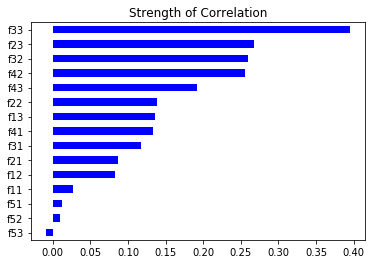

In [58]:
corr = df.corrwith(outcome)
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation')

Pretend for a minute that we don't know which features are going to be stronger and weaker, and which are going to tend to cluster together. We've got an idea that there are some quite strong features, some weaker, and some useless.

While correlation is not the perfect metric, it gives us a reasonable sense of strength of each feature's historical relationship to the outcome variable.

However, it says nothing about **orthogonality**. To get an idea about this, we'll take advantage of the very handy seaborn clustermap chart type which plots a heatmap representation of a covariance matrix and runs a hierarchical clustering algorithm to group together the most closely related features.

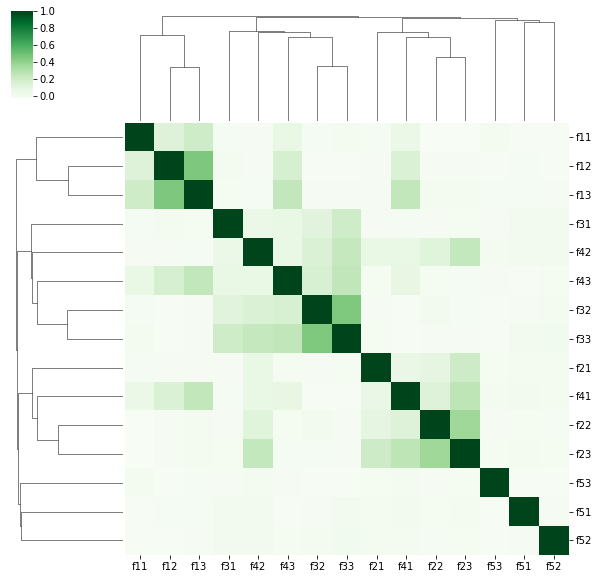

In [60]:
corr_matrix = df.corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(10,10),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

The algorithm has done a good job of finding the groupings of features. Of course, the diagonal of dark green represents each feature being perfectly correlated with itself, but we also see certain clusters of features which are similar to one another.

The cluster in the upper left captures **factor_1** (including some of the interaction effects). **factor_3** is fairly well isolated in the lower right corner, and in the middle we can see **factor_2** as well as some of the noise features.

Let's next focus in only on those features with correlations of greater than 0.1 to exclude the noise and weak features.

In [61]:
corr

f11    0.026976
f12    0.082633
f13    0.135967
f21    0.086559
f22    0.138004
f23    0.267866
f31    0.117151
f32    0.260044
f33    0.395424
f41    0.133465
f42    0.256070
f43    0.192317
f51    0.011717
f52    0.009695
f53   -0.009260
dtype: float64

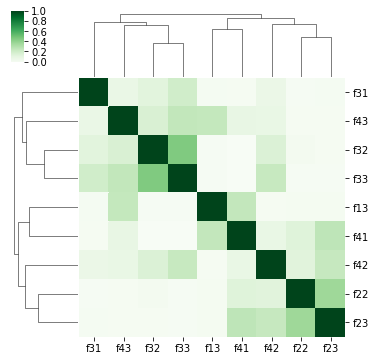

Correlation Strength:
f33    0.395424
f23    0.267866
f32    0.260044
f42    0.256070
f43    0.192317
f22    0.138004
f13    0.135967
f41    0.133465
f31    0.117151
dtype: float64


In [62]:
correlated_features = corr[corr>0.1].index.tolist()
corr_matrix = df[correlated_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns
print("Correlation Strength:")
print(corr[corr>0.1].sort_values(ascending=False))

Now the clusters look a bit sharper. We'll follow a simple heuristic to manually select the features.

**Step 1:** Take the most strongly correlated feature **(f33)** and add it to our list of selected features. **Step 2:** Take the second correlated feature **(f23)** and check to see if it's closely correlated (neighboring in the clustermap) to any features already chosen. If no, add to the list. If yes, discard. **Step 3:** Repeat this process until either (1) we've reached the target feature count, or (2) we've run out strongly correlated features.

C:\Users\SABAdmin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


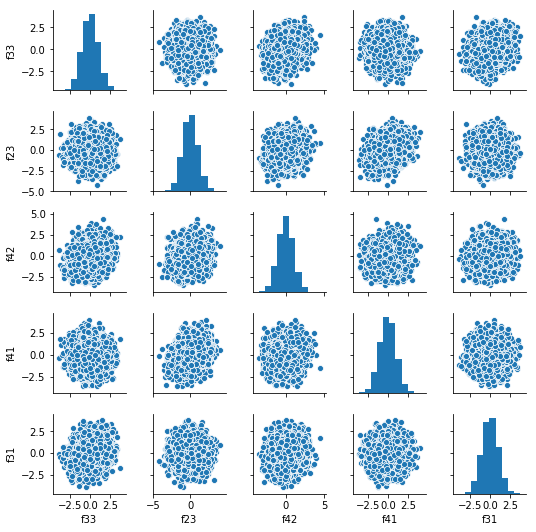

In [63]:
selected_features = ['f33','f23','f42','f41','f31']
import seaborn as sns
sns.pairplot(df[selected_features],size=1.5)

This list of features is not simply the highest correlated features. 

We have to run the clustermap one more time to see if we have missed any major clusters.

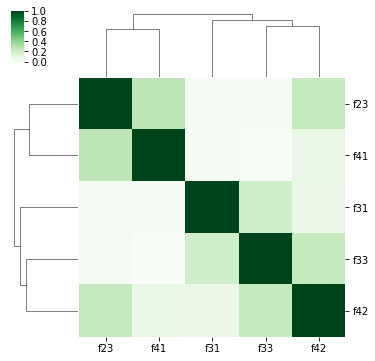

In [64]:
corr_matrix = df[selected_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

Looks generally pretty good. There is some residual covariance between features, so we haven't achieved orthogonal nirvana, but we're pretty close.

Up to here, we've only used a simple correlation statistic across the full time period. This is a good place to start.
Financial time series data suffers from non-stationarity and regime change, so a relationship which on average has existed may have been wildly unstable over time.

To check, we'll plot the rolling correlation of these selected features.

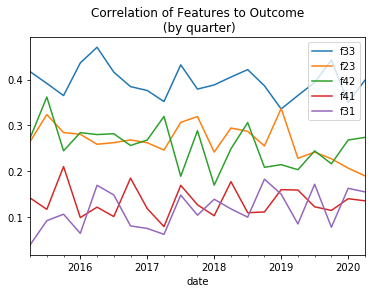

In [65]:
tmp = df[selected_features].join(outcome_scaled).reset_index().set_index('date')
tmp.dropna().resample('Q').apply(lambda x: x.corr()).iloc[:,-1].unstack()\
.iloc[:,:-1].plot(title='Correlation of Features to Outcome\n (by quarter)')
# shows time stability

As expected, since the data wasn't modeled with any non-stationarity, our features all appear to be robust over time. This gives increased confidence that the relationship we've found is likely to persist.

### 3. Correlation Matrix with Heatmap

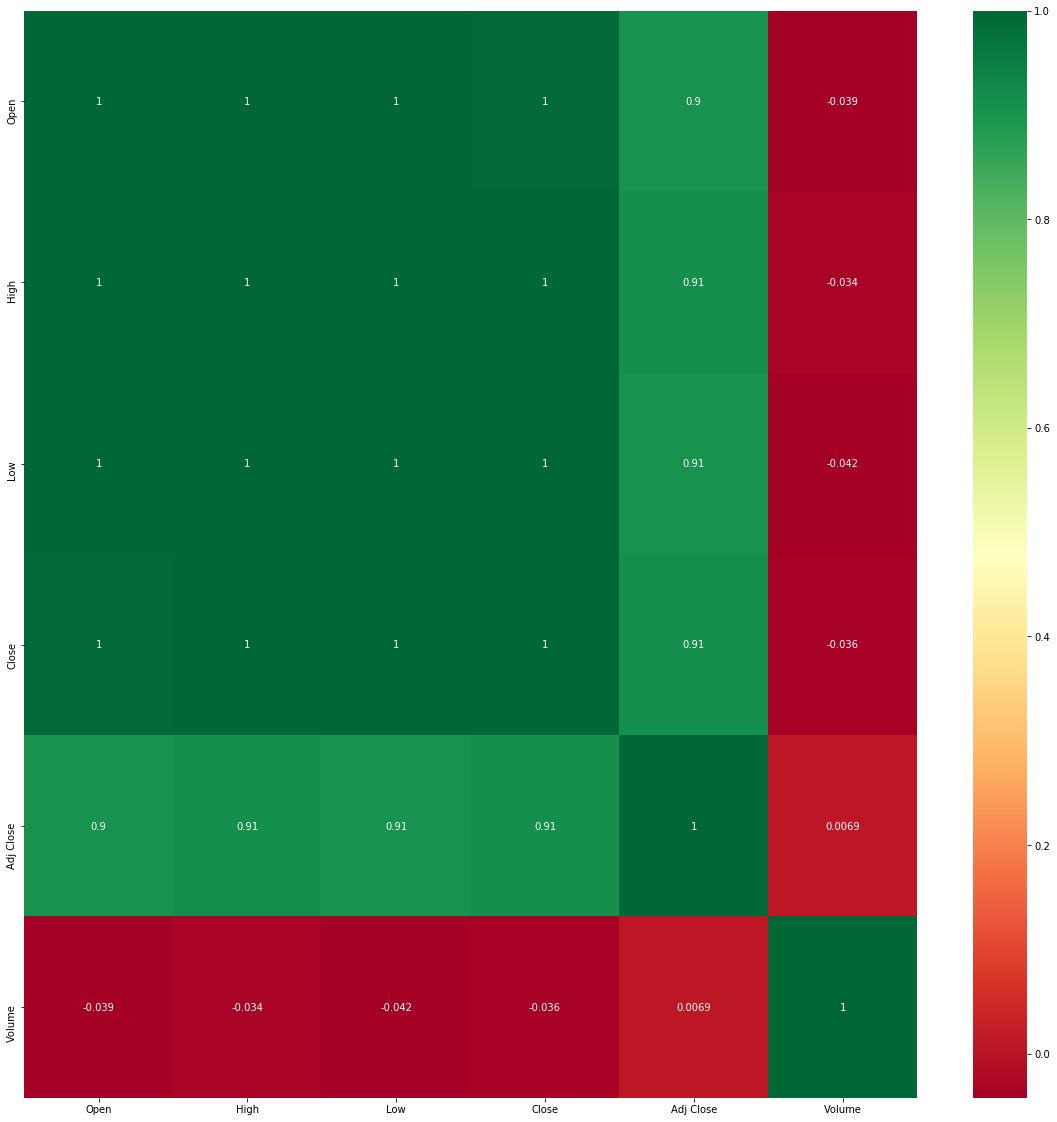

In [54]:
import seaborn as sns


X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Predict Stock Prices

### 1. Hierarchical Clustering with scikit-learn

In [37]:
data.shape

(1259, 7)

In [38]:
data = data.iloc[:, 3:5].values

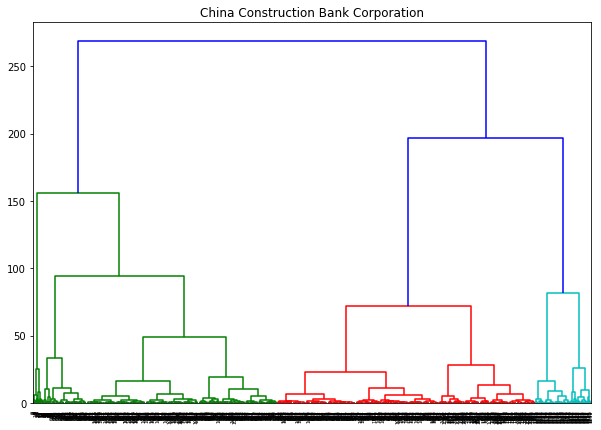

In [39]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("China Construction Bank Corporation")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In the script above we import the hierarchy class of the **scipy.cluster** library as **shc**. The hierarchy class has a 
**dendrogram** method which takes the value returned by the **linkage** method of the same class. The **linkage** method takes 
the dataset and the method to minimize distances as parameters. We use 'ward' as the **method** since it minimizes then 
variants of distances between the clusters

Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters. 
To do so we will again use the AgglomerativeClustering **class of the sklearn**.cluster library.

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

As a final step, let's plot the clusters to see how actually our data has been clustered:

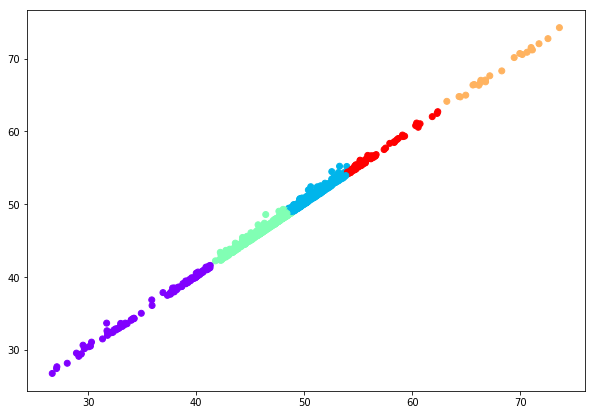

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

As we can see the data points in the form of five clusters.

### 2. Neural Network using TensorFlow

In [2]:
from sklearn.preprocessing import scale
from TFANN import ANNR

NumPy will be used for our matrix operations, Matplotlib for graphs, scikit-learn for data processing, 
TFANN for the Machine Learning goodness


Now we need to import the data that we have already processed. To do this we will execute the following command, which will provide us with a window to upload the .csv file.

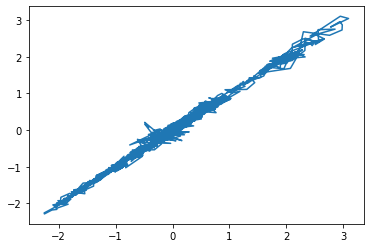

In [7]:
#reads data from the file and ceates a matrix with only the dates and the prices 
stock_data = np.loadtxt('CICHY.csv', delimiter=",", skiprows=1, usecols=(1, 4))

#scales the data to smaller values
stock_data=scale(stock_data)

#gets the price and dates from the matrix
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)

#creates a plot of the data and then displays it
plt.plot(dates[:, 0], prices[:, 0])
plt.show()

Now, we need to construct the model. In this case we will use one input and output neuron 
(input date, output price) and will have three hidden layers of 25 
neurons each. Each layer will have an “tanh” activation function.

In [ ]:
#Number of neurons in the input, output, and hidden layers
input = 1
output = 1
hidden = 50

#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]

#construct the model and dictate params
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)

W0515 10:34:45.012268 13536 deprecation_wrapper.py:119] From C:\Users\MASERU\Anaconda3\lib\site-packages\TFANN.py:211: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0515 10:34:46.459505 13536 deprecation_wrapper.py:119] From C:\Users\MASERU\Anaconda3\lib\site-packages\TFANN.py:212: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0515 10:34:46.459505 13536 deprecation_wrapper.py:119] From C:\Users\MASERU\Anaconda3\lib\site-packages\TFANN.py:222: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0515 10:35:12.324277 13536 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality n

We have now initialized the model and are ready to train!

### Training the Model

In [ ]:
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)

#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Once the training is complete, we can execute the following commands to see how we did.

In [ ]:
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)

#Display the predicted reuslts agains the actual data
plt.plot(dates, prices)
plt.plot(dates, pricePredict, c='#5aa9ab')
pl.show()

### ARIMA Model Time Series Forecasting

A popular and widely used statistical method for time series forecasting is the **ARIMA model**. **ARIMA** is an acronym that stands for **AutoRegressive Integrated Moving Average**. It is a class of model that captures a suite of different standard temporal structures in time series data

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

**AR: Autoregression**. A model that uses the dependent relationship between an observation and some number of lagged observations.

**I: Integrated**. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA: Moving Average**. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

**p:** The number of lag observations included in the model, also called the lag order.

**d:** The number of times that the raw observations are differenced, also called the degree of differencing.

**q:** The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2015-05-12  18.650000  18.750000  18.590000  18.750000  14.281879   50000
2015-05-13  18.860001  18.900000  18.820000  18.900000  14.396134  109000
2015-05-14  18.860001  18.920000  18.850000  18.920000  14.411368   31900
2015-05-15  19.030001  19.230000  19.030001  19.230000  14.647493   41000
2015-05-18  19.100000  19.110001  18.980000  19.049999  14.510389   53400


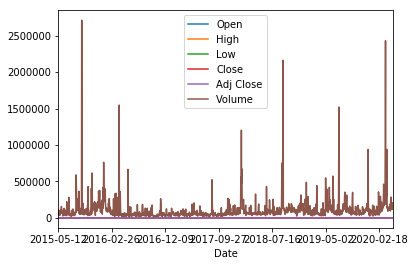

In [21]:
series = pd.read_csv('CICHY.csv', header=0, index_col=0, squeeze=True)
print(series.head())
series.plot()
plt.show()

This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

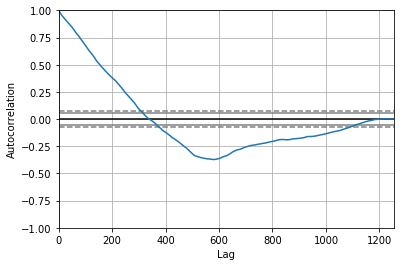

In [19]:
from pandas.plotting import autocorrelation_plot
 
series = pd.read_csv('CICHY.csv', header=0, index_col=0, squeeze=True)
autocorrelation_plot(series['Adj Close'])
plt.show()

we can see that there is a positive correlation with the first 200-to-400 lags that is perhaps significant for the first 5 lags.

A good starting point for the AR parameter of the model may be 5.

#### ARIMA with Python

The statsmodels library provides the capability to fit an ARIMA model.

An **ARIMA model** can be created using the **statsmodels** library as follows:

   **1:** Define the model by calling **ARIMA()** and passing in the **p, d,** and **q** parameters.

   **2:** The model is prepared on the training data by calling the **fit()** function.

   **3:** Predictions can be made by calling the **predict()** function and specifying the index of the time or times to be   predicted.

Let’s start off with something simple. We will fit an ARIMA model to the entire China Construction Bank Corporation (CICHY) dataset and review the residual errors.

First, we fit an **ARIMA(5,1,0)** model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

In [34]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from pandas import DataFrame

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1252
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  69.416
Method:                       css-mle   S.D. of innovations              0.229
Date:                Sun, 17 May 2020   AIC                           -124.832
Time:                        17:49:47   BIC                            -88.905
Sample:                             1   HQIC                          -111.327
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0009      0.006      0.140      0.889      -0.012       0.013
ar.L1.D.Adj Close    -0.0318      0.028     -1.125      0.261      -0.087       0.024
ar.L2.D.Adj Close     0.

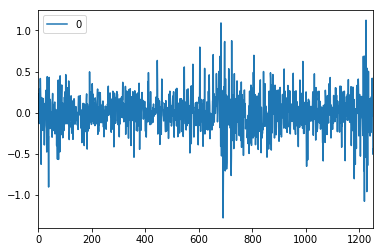

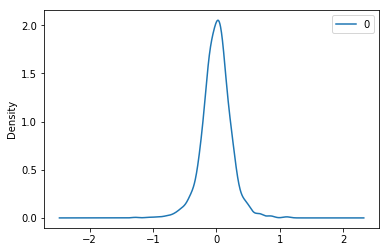

                 0
count  1252.000000
mean      0.000005
std       0.229011
min      -1.277529
25%      -0.125245
50%       0.004280
75%       0.126468
max       1.122964


In [35]:
data = pd.read_csv('CICHY.csv')
# fit model
model = ARIMA(data["Adj Close"], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())